In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.spatial import distance
from scipy import spatial

# import torchtext

In [2]:
embeddings_dict = {}

with open("../data/external/glove.6B.50d.txt", 'r') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.asarray(values[1:], "float32")
        embeddings_dict[word] = vector

In [3]:
data = pd.read_csv('../data/processed/all_embeddings_forML.csv')

In [4]:
def find_closest_embeddings(embedding):
    return sorted(embeddings_dict.keys(), key=lambda word: spatial.distance.euclidean(embeddings_dict[word], embedding))

In [5]:
result = embeddings_dict['turn'] + embeddings_dict['about'] - embeddings_dict['turnabout']
result

array([ 1.1074    ,  0.44753   ,  2.08042   , -0.961294  ,  0.9206194 ,
       -0.14345798, -1.0381601 , -0.85764   , -0.53208   , -0.92098   ,
       -0.52645   ,  0.55752   , -0.535697  , -0.513226  ,  1.685511  ,
        0.56301   ,  0.00928   ,  0.91048   , -0.39317998, -1.230388  ,
        0.65613   ,  1.026328  ,  2.17735   ,  1.33134   ,  0.30181003,
       -3.2769299 ,  0.74326   , -0.48087   ,  0.89970994, -0.82445   ,
        7.05174   ,  0.668944  , -0.665776  , -0.26253998, -0.3501683 ,
        0.08858001, -0.89135003, -0.55489004,  1.2405341 , -0.05573598,
        0.39427   ,  0.38880002,  1.1544399 ,  1.1628901 ,  0.29304802,
        0.192651  , -0.567754  , -1.41194   , -0.63672066, -0.205957  ],
      dtype=float32)

In [6]:
data.iloc[0,4:54]

c1_00    -0.28186
c1_01     0.76122
c1_02     0.31124
c1_03   -0.056947
c1_04    -0.16125
c1_05    -0.84541
c1_06     0.21271
c1_07     -1.1618
c1_08     0.66181
c1_09      1.2302
c1_10     0.78864
c1_11     0.83112
c1_12    -0.70775
c1_13     0.22583
c1_14     -0.7578
c1_15       1.221
c1_16     0.69907
c1_17    -0.81823
c1_18     0.19546
c1_19      1.8109
c1_20    -0.71717
c1_21     0.87639
c1_22     0.68515
c1_23    -0.10325
c1_24    -0.12523
c1_25      0.1229
c1_26    0.056091
c1_27    -0.18191
c1_28    0.036424
c1_29     0.43651
c1_30     -0.5549
c1_31     0.35513
c1_32     0.26945
c1_33     0.58567
c1_34      0.6719
c1_35    -0.52472
c1_36     0.59862
c1_37    -0.47292
c1_38     0.33516
c1_39      1.8675
c1_40    0.079179
c1_41      1.2164
c1_42    -0.23826
c1_43     0.00516
c1_44     0.44026
c1_45    -0.63698
c1_46    -0.24248
c1_47    -0.38488
c1_48     0.11777
c1_49      0.2475
Name: 0, dtype: object

In [7]:
residual_vectors = [ np.array(np.array(data.iloc[x, 4:54]) + np.array(data.iloc[x,54:104]) - np.array(data.iloc[x,104:154])) for x in range(len(data['cmp'])) ]

In [8]:
residual_dotprods = [ np.dot(array, array) for array in residual_vectors ]

Text(0.5, 0, 'residual vectors')

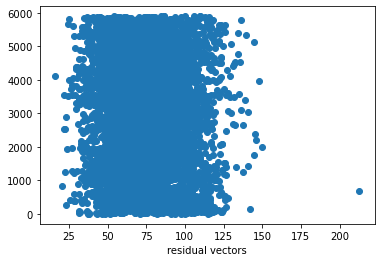

In [9]:
fig = plt.figure()

ax = fig.add_subplot()

ax.scatter( np.array( residual_dotprods ), ([x for x in range(len(residual_vectors))]) )

ax.set_xlabel('residual vectors')

This examines the length of residual vectors which doesn't seem to be very valuable...